# Optimization Using Newton's Method

In this lab you will implement Newton's method optimizing some functions in one and two variables. You will also compare it with the gradient descent, experiencing advantages and disadvantages of each of the methods.

# Table of Contents

- [ 1 - Function in One Variable](#1)
- [ 2 - Function in Two Variables](#2)

## Packages

Run the following cell to load the packages you'll need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

<a name='1'></a>
## 1 - Function in One Variable

You will use Newton's method to optimize a function $f\left(x\right)$. Aiming to find a point, where the derivative equals to zero, you need to start from some initial point $x_0$, calculate first and second derivatives ($f'(x_0)$ and $f''(x_0)$) and step to the next point using the expression:

$$x_1 = x_0 - \frac{f'(x_0)}{f''(x_0)},\tag{1}$$

Repeat the process iteratively. Number of iterations $n$ is usually also a parameter. 

Let's optimize function $f\left(x\right)=e^x - \log(x)$ (defined for $x>0$) using Newton's method. To implement it in the code, define function $f\left(x\right)=e^x - \log(x)$, its first and second derivatives $f'(x)=e^x - \frac{1}{x}$, $f''(x)=e^x + \frac{1}{x^2}$:

In [2]:
def f_example_1(x):
    return np.exp(x) - np.log(x)

def dfdx_example_1(x):
    return np.exp(x) - 1/x

def d2fdx2_example_1(x):
    return np.exp(x) + 1/(x**2)

x_0 = 1.6
print(f"f({x_0}) = {f_example_1(x_0)}")
print(f"f'({x_0}) = {dfdx_example_1(x_0)}")
print(f"f''({x_0}) = {d2fdx2_example_1(x_0)}")

f(1.6) = 4.483028795149379
f'(1.6) = 4.328032424395115
f''(1.6) = 5.343657424395115


Plot the function to visualize the global minimum:

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f\\,(x)$'>)

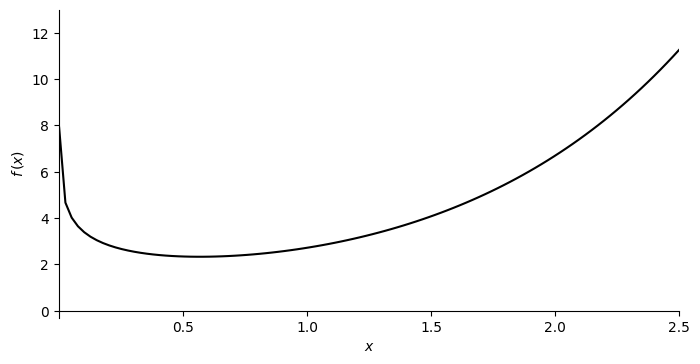

In [3]:
def plot_f(x_range, y_range, f, ox_position):
    x = np.linspace(*x_range, 100)
    fig, ax = plt.subplots(1,1,figsize=(8,4))

    ax.set_ylim(*y_range)
    ax.set_xlim(*x_range)
    ax.set_ylabel('$f\,(x)$')
    ax.set_xlabel('$x$')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', ox_position))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.autoscale(enable=False)
    
    pf = ax.plot(x, f(x), 'k')
    
    return fig, ax

plot_f([0.001, 2.5], [-0.3, 13], f_example_1, 0.0)

Implement Newton's method described above:

In [4]:
def newtons_method(dfdx, d2fdx2, x, num_iterations=100):
    for iteration in range(num_iterations):
        x = x - dfdx(x) / d2fdx2(x)
        print(x)
    return x

In addition to the first and second derivatives, there are two other parameters in this implementation: number of iterations `num_iterations`, initial point `x`. To optimize the function, set up the parameters and call the defined function gradient_descent:

In [5]:
num_iterations_example_1 = 25; x_initial = 1.6
newtons_example_1 = newtons_method(dfdx_example_1, d2fdx2_example_1, x_initial, num_iterations_example_1)
print("Newton's method result: x_min =", newtons_example_1)

0.7900617721793732
0.5436324685389214
0.5665913613835818
0.567143002403454
0.5671432904097056
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
Newton's method result: x_min = 0.5671432904097838


You can see that starting from the initial point $x_0 = 1.6$ Newton's method converges after $6$ iterations. You could actually exit the loop when there is no significant change of $x$ each step (or when first derivative is close to zero).

What if gradient descent was used starting from the same intial point?

In [6]:
def gradient_descent(dfdx, x, learning_rate=0.1, num_iterations=100):
    for iteration in range(num_iterations):
        x = x - learning_rate * dfdx(x)
        print(x)
    return x

num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.2; x_initial = 1.6
gd_example_1 = gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations)
print("Gradient descent result: x_min =", gd_example_1) 

1.1671967575604887
0.9315747895403638
0.7850695373565493
0.693190848956033
0.6374425307430822
0.6051557294974615
0.5872487093998153
0.5776311173426577
0.5725707323584608
0.5699397792550739
0.5685808560397663
0.5678813962508925
0.5675220281938029
0.567337566350933
0.5672429290172856
0.567194387884144
0.5671694934881042
0.5671567271988156
0.5671501806396171
0.5671468236191124
0.5671451021825211
0.5671442194561769
0.5671437668086716
0.5671435346987772
0.5671434156768685
Gradient descent result: x_min = 0.5671434156768685


Gradient descent method has an extra parameter `learning_rate`. If you take it equal to `0.1` in this example, the method will start to converge after about $15$ iterations (aiming for an accuracy of 4-5 decimal places). If you increase it to $0.2$, gradient descent will converge within about $12$ iterations, which is still slower than Newton's method. 

So, those are disadvantages of gradient descent method in comparison with Newton's method: there is an extra parameter to control and it converges slower. However it has an advantage - in each step you do not need to calculate second derivative, which in more complicated cases is quite computationally expensive to find. So, one step of gradient descent method is easier to make than one step of Newton's method.

This is the reality of numerical optimization - convergency and actual result depend on the initial parameters. Also, there is no "perfect" algorithm - every method will have advantages and disadvantages.

<a name='2'></a>
## 2 - Function in Two Variables

In case of a function in two variables, Newton's method will require even more computations. Starting from the intial point $(x_0, y_0)$, the step to the next point shoud be done using the expression: 

$$\begin{bmatrix}x_1 \\ y_1\end{bmatrix} = \begin{bmatrix}x_0 \\ y_0\end{bmatrix} - 
H^{-1}\left(x_0, y_0\right)\nabla f\left(x_0, y_0\right),\tag{2}$$

where $H^{-1}\left(x_0, y_0\right)$ is an inverse of a Hessian matrix at point $(x_0, y_0)$ and $\nabla f\left(x_0, y_0\right)$ is the gradient at that point.

Let's implement that in the code. Define the function $f(x, y)$ like in the videos, its gradient and Hessian:

\begin{align}
f\left(x, y\right) &= x^4 + 0.8 y^4 + 4x^2 + 2y^2 - xy - 0.2x^2y,\\
\nabla f\left(x, y\right) &= \begin{bmatrix}4x^3 + 8x - y - 0.4xy \\ 3.2y^3 + 4y - x - 0.2x^2\end{bmatrix}, \\
H\left(x, y\right) &= \begin{bmatrix}12x^2 + 8 - 0.4y && -1 - 0.4x \\ -1 - 0.4x && 9.6y^2 + 4\end{bmatrix}.
\end{align}

In [7]:
def f_example_2(x, y):
    return x**4 + 0.8*y**4 + 4*x**2 + 2*y**2 - x*y -0.2*x**2*y

def grad_f_example_2(x, y):
    return np.array([[4*x**3 + 8*x - y - 0.4*x*y],
                     [3.2*y**3 +4*y - x - 0.2*x**2]])

def hessian_f_example_2(x, y):
    hessian_f = np.array([[12*x**2 + 8 - 0.4*y, -1 - 0.4*x],
                         [-1 - 0.4*x, 9.6*y**2 + 4]])
    return hessian_f

x_0, y_0 = 4, 4
print(f"f{x_0, y_0} = {f_example_2(x_0, y_0)}")
print(f"grad f{x_0, y_0} = \n{grad_f_example_2(x_0, y_0)}")
print(f"H{x_0, y_0} = \n{hessian_f_example_2(x_0, y_0)}")

f(4, 4) = 528.0
grad f(4, 4) = 
[[277.6]
 [213.6]]
H(4, 4) = 
[[198.4  -2.6]
 [ -2.6 157.6]]


Run the following cell to plot the function:

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='$x$', ylabel='$y$'>,
 <Axes3D: xlabel='$x$', ylabel='$y$', zlabel='$f$'>)

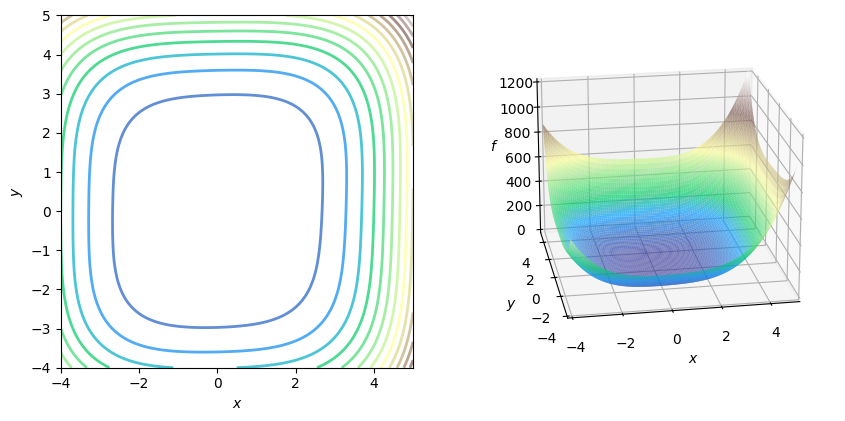

In [8]:
def plot_f_cont_and_surf(f):
    
    fig = plt.figure( figsize=(10,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.set_facecolor('#ffffff')
    gs = GridSpec(1, 2, figure=fig)
    axc = fig.add_subplot(gs[0, 0])
    axs = fig.add_subplot(gs[0, 1],  projection='3d')
    
    x_range = [-4, 5]
    y_range = [-4, 5]
    z_range = [0, 1200]
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X,Y = np.meshgrid(x,y)
    
    cont = axc.contour(X, Y, f(X, Y), cmap='terrain', levels=18, linewidths=2, alpha=0.7)
    axc.set_xlabel('$x$')
    axc.set_ylabel('$y$')
    axc.set_xlim(*x_range)
    axc.set_ylim(*y_range)
    axc.set_aspect("equal")
    axc.autoscale(enable=False)
    
    surf = axs.plot_surface(X,Y, f(X,Y), cmap='terrain', 
                    antialiased=True,cstride=1,rstride=1, alpha=0.69)
    axs.set_xlabel('$x$')
    axs.set_ylabel('$y$')
    axs.set_zlabel('$f$')
    axs.set_xlim(*x_range)
    axs.set_ylim(*y_range)
    axs.set_zlim(*z_range)
    axs.view_init(elev=20, azim=-100)
    axs.autoscale(enable=False)
    
    return fig, axc, axs

plot_f_cont_and_surf(f_example_2)

Newton's method $(2)$ is implemented in the following function:

In [9]:
def newtons_method_2(f, grad_f, hessian_f, x_y, num_iterations=100):
    for iteration in range(num_iterations):
        x_y = x_y - np.matmul(np.linalg.inv(hessian_f(x_y[0,0], x_y[1,0])), grad_f(x_y[0,0], x_y[1,0]))
        print(x_y.T)
    return x_y

Now run the following code to find the minimum:

In [10]:
num_iterations_example_2 = 25; x_y_initial = np.array([[4], [4]])
newtons_example_2 = newtons_method_2(f_example_2, grad_f_example_2, hessian_f_example_2, 
                                     x_y_initial, num_iterations=num_iterations_example_2)
print("Newton's method result: x_min, y_min =", newtons_example_2.T)

[[2.58273866 2.62128884]]
[[1.59225691 1.67481611]]
[[0.87058917 1.00182107]]
[[0.33519431 0.49397623]]
[[0.04123585 0.12545903]]
[[0.00019466 0.00301029]]
[[-2.48536390e-08  3.55365461e-08]]
[[ 4.15999751e-17 -2.04850948e-17]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
Newton's method result: x_min, y_min = [[0. 0.]]


In this example starting from the initial point $(4, 4)$ it will converge after about $9$ iterations. Try to compare it with the gradient descent now:

In [11]:
def gradient_descent_2(grad_f, x_y, learning_rate=0.1, num_iterations=100):
    for iteration in range(num_iterations):
        x_y = x_y - learning_rate * grad_f(x_y[0,0], x_y[1,0])
        print(x_y.T)
    return x_y

num_iterations_2 = 300; learning_rate_2 = 0.02; x_y_initial = np.array([[4], [4]])
# num_iterations_2 = 300; learning_rate_2 = 0.03; x_y_initial = np.array([[4], [4]])
gd_example_2 = gradient_descent_2(grad_f_example_2, x_y_initial, learning_rate_2, num_iterations_2)
print("Gradient descent result: x_min, y_min =", gd_example_2) 

[[-1.552 -0.272]]
[[-1.00667816 -0.27035727]]
[[-0.76722601 -0.26354393]]
[[-0.61199381 -0.2542789 ]]
[[-0.49957833 -0.24362609]]
[[-0.41356991 -0.23220381]]
[[-0.34561558 -0.22041345]]
[[-0.29081322 -0.20852957]]
[[-0.24600097 -0.19674484]]
[[-0.20899755 -0.1851958 ]]
[[-0.17822189 -0.17397885]]
[[-0.15248504 -0.1631609 ]]
[[-0.13086798 -0.15278673]]
[[-0.11264557 -0.14288438]]
[[-0.09723686 -0.13346909]]
[[-0.08417097 -0.12454632]]
[[-0.07306297 -0.11611405]]
[[-0.0635961  -0.10816464]]
[[-0.05550841 -0.10068622]]
[[-0.04858239 -0.09366384]]
[[-0.04263691 -0.08708035]]
[[-0.03752071 -0.08091713]]
[[-0.03310722 -0.07515463]]
[[-0.02929035 -0.06977285]]
[[-0.02598099 -0.06475166]]
[[-0.02310421 -0.06007107]]
[[-0.02059686 -0.05571146]]
[[-0.01840572 -0.05165372]]
[[-0.01648577 -0.04787936]]
[[-0.01479896 -0.04437062]]
[[-0.01331303 -0.04111048]]
[[-0.01200059 -0.03808275]]
[[-0.01083835 -0.03527203]]
[[-0.0098065  -0.03266375]]
[[-0.00888809 -0.03024417]]
[[-0.00806868 -0.02800031]]
[[

Obviously, gradient descent will converge much slower than Newton's method. And trying to increase learning rate, it might not even work at all. This illustrates again the disadvantages of gradient descent in comparison with Newton's method. However, note, that Newton's method required calculation of an inverted Hessian matrix, which is a very computationally expensive calculation to perform when you have, say, a thousand of parameters.

Well done on finishing this lab!